In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd "/content/drive/My Drive/Intelligent Systems/Decision Trees"

/content/drive/My Drive/Intelligent Systems/Decision Trees


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('heart_failure.data',header=0)
heart = df.to_numpy()
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


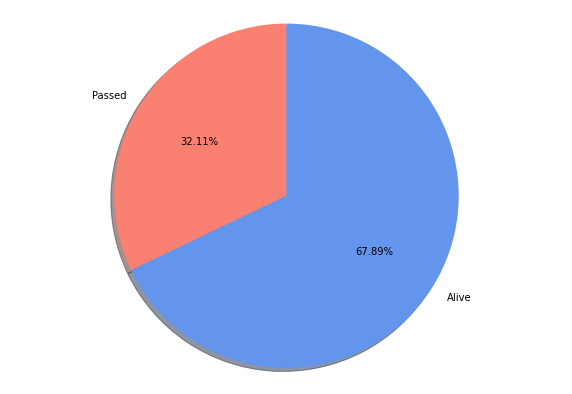

In [4]:
from matplotlib.pyplot import figure
y = heart[:, 12:]
ratio = 0
for cases in y:
  ratio = ratio + cases[0]
  
labels = 'Passed', 'Alive'
sizes = [ratio, len(y)-ratio]
fig, axs = plt.subplots()
axs.pie(sizes, explode=None, labels=labels, colors=['salmon', 'cornflowerblue'], autopct='%1.2f%%',
        shadow=True, startangle=90)
axs.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig.set_size_inches(10,7)

plt.show()

In [5]:
dead=[]
alive=[]
for row in heart:
  if row[12] == 1:
    dead.append(row) 
  else:
    alive.append(row)

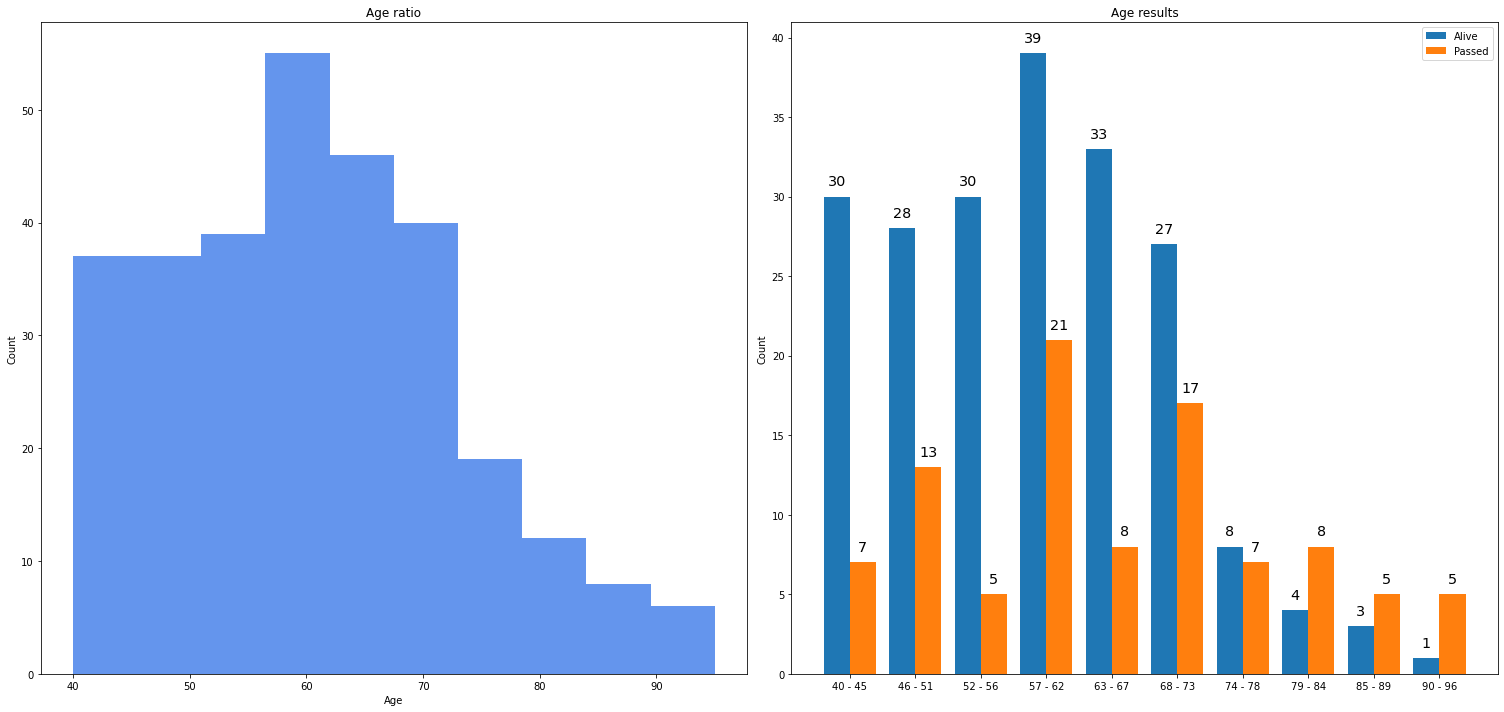

In [6]:
labels = ['40 - 45', '46 - 51', '52 - 56','57 - 62', '63 - 67', '68 - 73', '74 - 78', '79 - 84', '85 - 89', '90 - 96']
age_alive = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
age_dead = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

for row in heart:
  if row[0] < 46:
    if row[12] == 0:
      age_alive[0] += 1      
    else:
      age_dead[0] += 1
  elif row[0] < 52:
    if row[12] == 0:
      age_alive[1] += 1      
    else:
      age_dead[1] += 1
  elif row[0] < 57:
    if row[12] == 0:
      age_alive[2] += 1      
    else:
      age_dead[2] += 1   
  elif row[0] < 63:
    if row[12] == 0:
      age_alive[3] += 1      
    else:
      age_dead[3] += 1   
  elif row[0] < 68:
    if row[12] == 0:
      age_alive[4] += 1      
    else:
      age_dead[4] += 1   
  elif row[0] < 74:
    if row[12] == 0:
      age_alive[5] += 1      
    else:
      age_dead[5] += 1   
  elif row[0] < 79:
    if row[12] == 0:
      age_alive[6] += 1      
    else:
      age_dead[6] += 1   
  elif row[0] < 85:
    if row[12] == 0:
      age_alive[7] += 1      
    else:
      age_dead[7] += 1   
  elif row[0] < 90:
    if row[12] == 0:
      age_alive[8] += 1      
    else:
      age_dead[8] += 1 
  else:
    if row[12] == 0:
      age_alive[9] += 1      
    else:
      age_dead[9] += 1 

fig, ax = plt.subplots(1,2)
fig.set_size_inches(21,10)
ax[0].hist(df['age'],color='cornflowerblue')
ax[0].set_ylabel('Count')
ax[0].set_xlabel('Age')
ax[0].set_title('Age ratio')
x = np.arange(len(labels))


rects1 = ax[1].bar(x - 0.4/2, age_alive, 0.4, label='Alive')
rects2 = ax[1].bar(x + 0.4/2, age_dead, 0.4, label='Passed')
x = np.arange(len(labels)) 
ax[1].set_ylabel('Count')
ax[1].set_title('Age results')
ax[1].set_xticks(x)
ax[1].set_xticklabels(labels)
ax[1].legend()

for i in x:
  ax[1].text(x[i] - 0.4/2, age_alive[i] + 0.5, age_alive[i] ,ha='center', va='bottom', fontsize = 'x-large')
  ax[1].text(x[i] + 0.4/2, age_dead[i] + 0.5, age_dead[i] ,ha='center', va='bottom', fontsize = 'x-large')

fig.tight_layout()
plt.show()

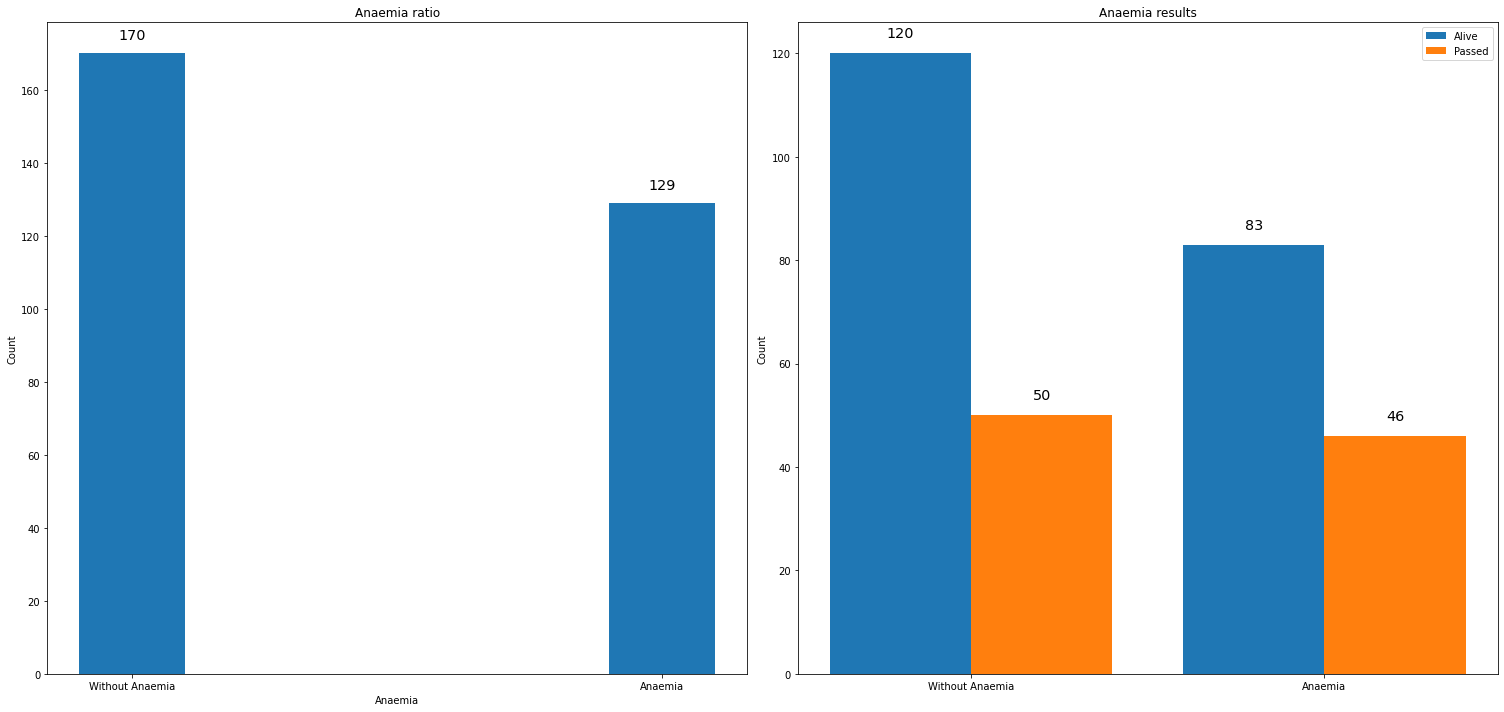

In [7]:
labels = ['Without Anaemia', 'Anaemia']
anaemia_alive = [0, 0]
anaemia_dead = [0, 0]

for row in heart:
  if row[1] == 0:
    if row[12] == 0:
      anaemia_alive[0] += 1      
    else:
      anaemia_dead[0] += 1
  else:
    if row[12] == 0:
      anaemia_alive[1] += 1      
    else:
      anaemia_dead[1] += 1

x = np.arange(len(labels))
fig, ax = plt.subplots(1,2)
fig.set_size_inches(21,10)
ax[0].bar(x, df.anaemia.value_counts(), 0.2)
ax[0].set_ylabel('Count')
ax[0].set_xlabel('Anaemia')
ax[0].set_title('Anaemia ratio')
ax[0].set_xticks(x)
ax[0].text(1, df.anaemia.value_counts()[1] + 3, df.anaemia.value_counts()[1],ha='center', va='bottom', fontsize = 'x-large')
ax[0].text(0, df.anaemia.value_counts()[0] + 3, df.anaemia.value_counts()[0],ha='center', va='bottom', fontsize = 'x-large')
ax[0].set_xticklabels(labels)



rects1 = ax[1].bar(x - 0.4/2, anaemia_alive, 0.4, label='Alive')
rects2 = ax[1].bar(x + 0.4/2, anaemia_dead, 0.4, label='Passed')
ax[1].set_ylabel('Count')
ax[1].set_title('Anaemia results')
ax[1].set_xticks(x)
ax[1].set_xticklabels(labels)
ax[1].legend()
for i in [0,1]:
  ax[1].text(x[i] - 0.4/2, anaemia_alive[i] + 2.5, anaemia_alive[i] ,ha='center', va='bottom', fontsize = 'x-large')
  ax[1].text(x[i] + 0.4/2, anaemia_dead[i] + 2.5, anaemia_dead[i] ,ha='center', va='bottom', fontsize = 'x-large')

fig.tight_layout()
plt.show()

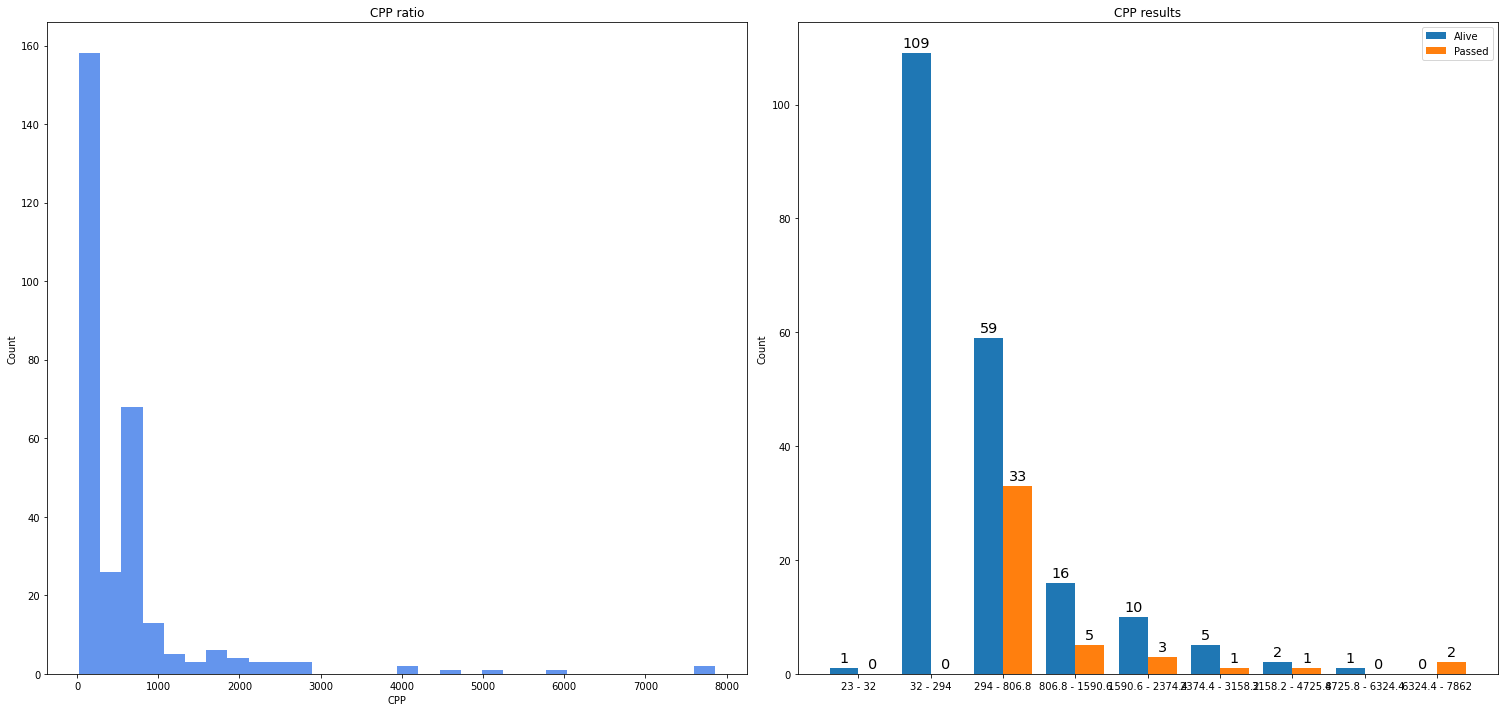

In [8]:
labels = ['23 - 32','32 - 294', '294 - 806.8', '806.8 - 1590.6', '1590.6 - 2374.4','2374.4 - 3158.2', '3158.2 - 4725.8', '4725.8 - 6324.4', '6324.4 - 7862']
cpp_alive = [0, 0, 0, 0, 0, 0, 0, 0, 0]
cpp_dead = [0, 0, 0, 0, 0, 0, 0, 0, 0]

for row in heart:
  if row[2] < 32:
    if row[12] == 0:
      cpp_alive[0] += 1      
    else:
      age_dead[0] += 1 
  elif row[2] < 294:
    if row[12] == 0:
      cpp_alive[1] += 1      
    else:
      age_dead[1] += 1 
  elif row[2] < 806.8:
      if row[12] == 0:
        cpp_alive[2] += 1      
      else:
        cpp_dead[2] += 1
  elif row[2] < 1590.6:
    if row[12] == 0:
      cpp_alive[3] += 1      
    else:
      cpp_dead[3] += 1
  elif row[2] < 2374.4:
    if row[12] == 0:
      cpp_alive[4] += 1      
    else:
      cpp_dead[4] += 1   
  elif row[2] < 3158.2:
    if row[12] == 0:
      cpp_alive[5] += 1      
    else:
      cpp_dead[5] += 1   
  elif row[2] <  4725.8:
    if row[12] == 0:
      cpp_alive[6] += 1      
    else:
      cpp_dead[6] += 1   
  elif row[2] < 6324.4:
    if row[12] == 0:
      cpp_alive[7] += 1      
    else:
      age_dead[7] += 1   
  else: 
    if row[12] == 0:
      cpp_alive[8] += 1      
    else:
      cpp_dead[8] += 1   

fig, ax = plt.subplots(1,2)
fig.set_size_inches(21,10)
ax[0].hist(df['creatinine_phosphokinase'],30,color='cornflowerblue')
ax[0].set_ylabel('Count')
ax[0].set_xlabel('CPP')
ax[0].set_title('CPP ratio')
x = np.arange(len(labels))


rects1 = ax[1].bar(x - 0.4/2, cpp_alive, 0.4, label='Alive')
rects2 = ax[1].bar(x + 0.4/2, cpp_dead, 0.4, label='Passed')
x = np.arange(len(labels)) 
ax[1].set_ylabel('Count')
ax[1].set_title('CPP results')
ax[1].set_xticks(x)
ax[1].set_xticklabels(labels)
ax[1].legend()

for i in x:
  ax[1].text(x[i] - 0.4/2, cpp_alive[i] + 0.5, cpp_alive[i] ,ha='center', va='bottom', fontsize = 'x-large')
  ax[1].text(x[i] + 0.4/2, cpp_dead[i] + 0.5, cpp_dead[i] ,ha='center', va='bottom', fontsize = 'x-large')
fig.tight_layout()
plt.show()

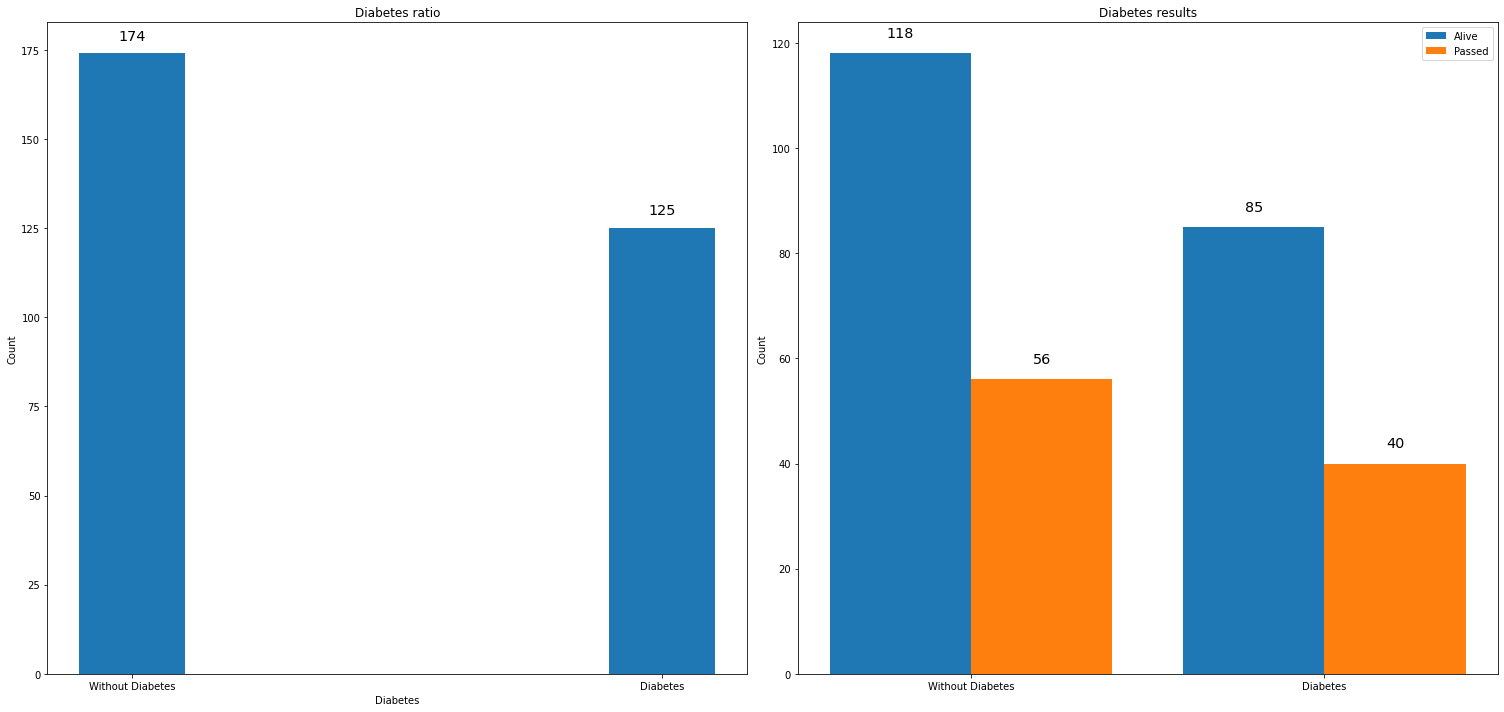

In [9]:
labels = ['Without Diabetes', 'Diabetes']
diabetes_alive = [0, 0]
diabetes_dead = [0, 0]

for row in heart:
  if row[3] == 0:
    if row[12] == 0:
      diabetes_alive[0] += 1      
    else:
      diabetes_dead[0] += 1
  else:
    if row[12] == 0:
      diabetes_alive[1] += 1      
    else:
      diabetes_dead[1] += 1

x = np.arange(len(labels))
fig, ax = plt.subplots(1,2)
fig.set_size_inches(21,10)
ax[0].bar(x, df.diabetes.value_counts(), 0.2)
ax[0].set_ylabel('Count')
ax[0].set_xlabel('Diabetes')
ax[0].set_title('Diabetes ratio')
ax[0].set_xticks(x)
ax[0].text(1, df.diabetes.value_counts()[1] + 3, df.diabetes.value_counts()[1],ha='center', va='bottom', fontsize = 'x-large')
ax[0].text(0, df.diabetes.value_counts()[0] + 3, df.diabetes.value_counts()[0],ha='center', va='bottom', fontsize = 'x-large')
ax[0].set_xticklabels(labels)


rects1 = ax[1].bar(x - 0.4/2, diabetes_alive, 0.4, label='Alive')
rects2 = ax[1].bar(x + 0.4/2, diabetes_dead, 0.4, label='Passed')
ax[1].set_ylabel('Count')
ax[1].set_title('Diabetes results')
ax[1].set_xticks(x)
ax[1].set_xticklabels(labels)
ax[1].legend()
for i in [0,1]:
  ax[1].text(x[i] - 0.4/2, diabetes_alive[i] + 2.5, diabetes_alive[i] ,ha='center', va='bottom', fontsize = 'x-large')
  ax[1].text(x[i] + 0.4/2, diabetes_dead[i] + 2.5, diabetes_dead[i] ,ha='center', va='bottom', fontsize = 'x-large')

fig.tight_layout()
plt.show()

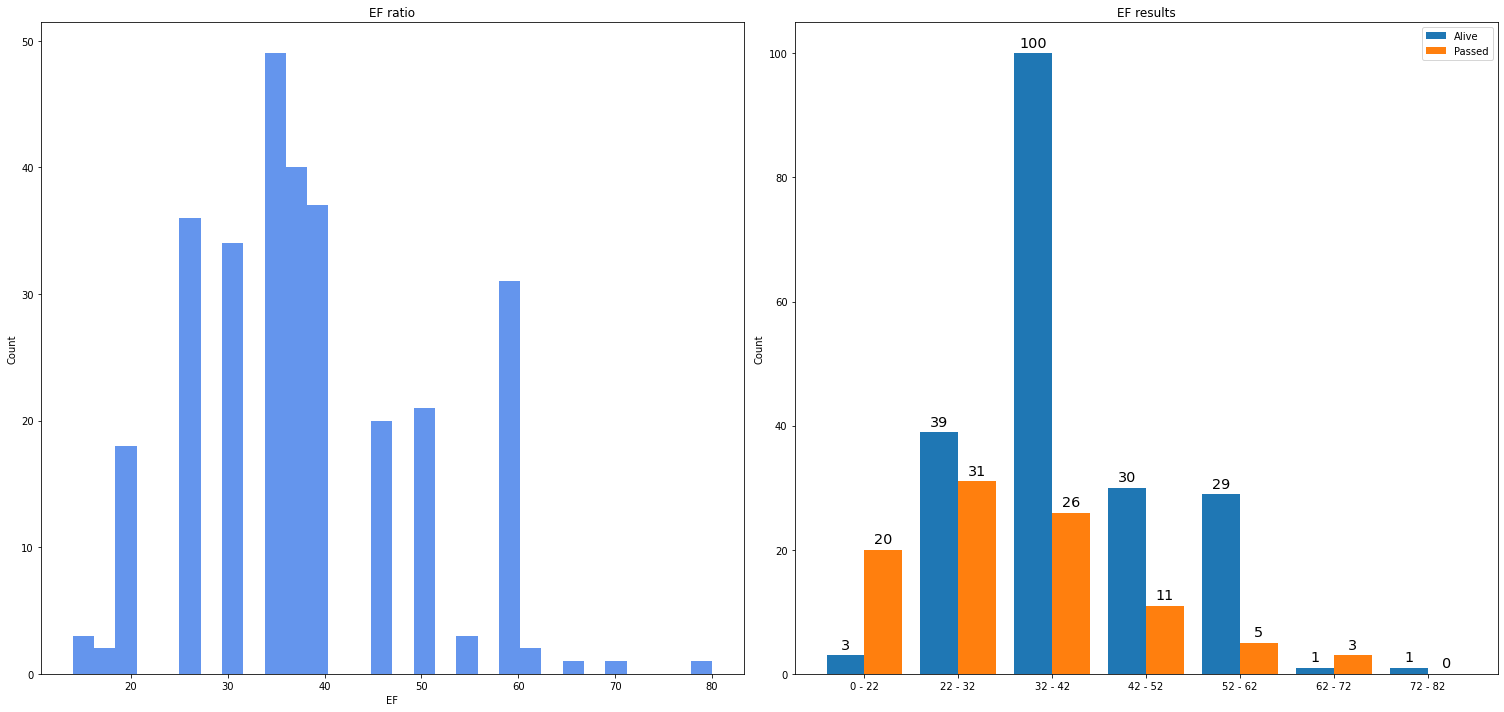

In [10]:
labels = ['0 - 22','22 - 32', '32 - 42', '42 - 52', '52 - 62','62 - 72', '72 - 82']
ef_alive = [0, 0, 0, 0, 0, 0, 0]
ef_dead = [0, 0, 0, 0, 0, 0, 0]

for row in heart:
  if row[4] < 22:
    if row[12] == 0:
      ef_alive[0] += 1      
    else:
      ef_dead[0] += 1 
  elif row[4] < 32:
    if row[12] == 0:
      ef_alive[1] += 1      
    else:
      ef_dead[1] += 1 
  elif row[4] < 42:
    if row[12] == 0:
      ef_alive[2] += 1      
    else:
      ef_dead[2] += 1
  elif row[4] < 52:
    if row[12] == 0:
      ef_alive[3] += 1      
    else:
      ef_dead[3] += 1
  elif row[4] < 62:
    if row[12] == 0:
      ef_alive[4] += 1      
    else:
      ef_dead[4] += 1   
  elif row[4] < 72:
    if row[12] == 0:
      ef_alive[5] += 1      
    else:
      ef_dead[5] += 1   
  else: 
    if row[12] == 0:
      ef_alive[6] += 1      
    else:
      ef_dead[6] += 1   


fig, ax = plt.subplots(1,2)
fig.set_size_inches(21,10)
ax[0].hist(df['ejection_fraction'],30,color='cornflowerblue')
ax[0].set_ylabel('Count')
ax[0].set_xlabel('EF')
ax[0].set_title('EF ratio')
x = np.arange(len(labels))

rects1 = ax[1].bar(x - 0.4/2, ef_alive, 0.4, label='Alive')
rects2 = ax[1].bar(x + 0.4/2, ef_dead, 0.4, label='Passed')
x = np.arange(len(labels)) 
ax[1].set_ylabel('Count')
ax[1].set_title('EF results')
ax[1].set_xticks(x)
ax[1].set_xticklabels(labels)
ax[1].legend()

for i in x:
  ax[1].text(x[i] - 0.4/2, ef_alive[i] + 0.5, ef_alive[i] ,ha='center', va='bottom', fontsize = 'x-large')
  ax[1].text(x[i] + 0.4/2, ef_dead[i] + 0.5, ef_dead[i] ,ha='center', va='bottom', fontsize = 'x-large')
fig.tight_layout()
plt.show()

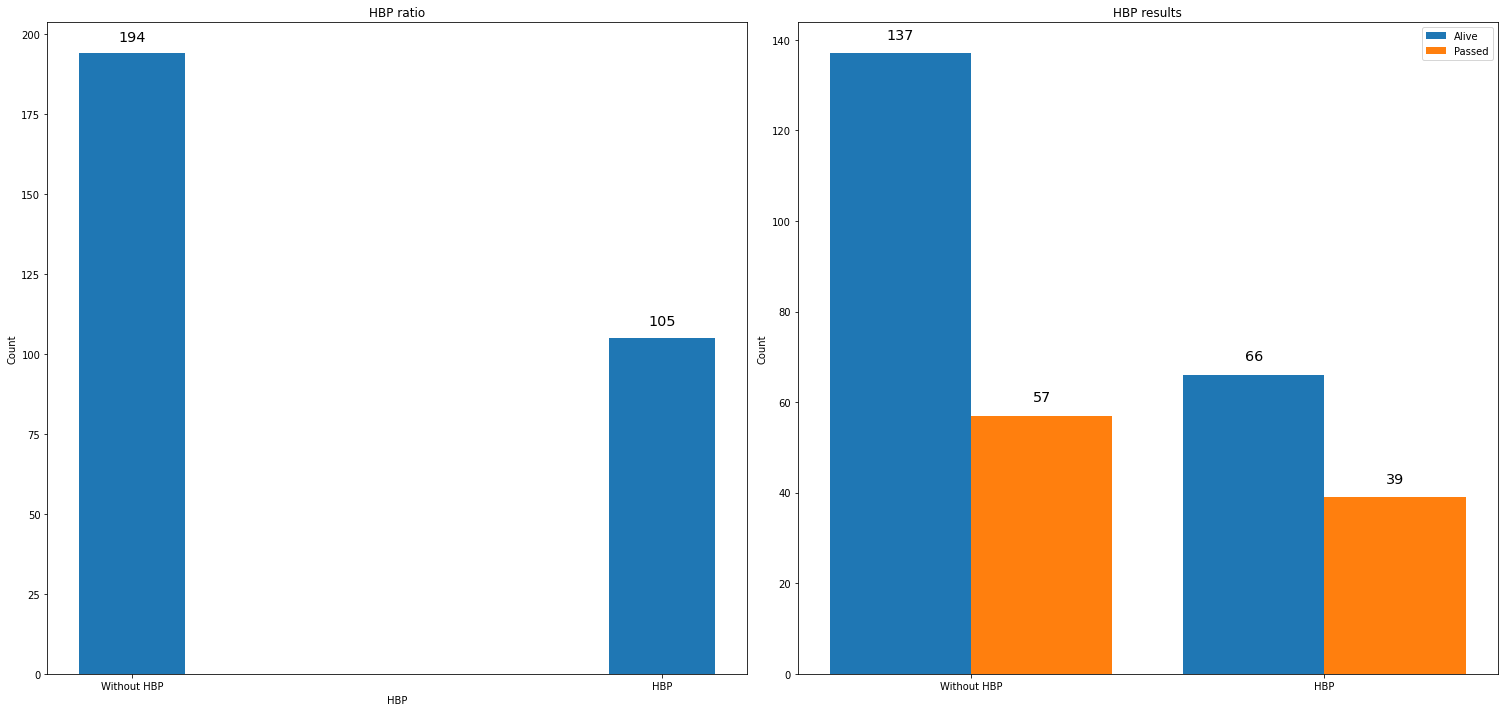

In [11]:
labels = ['Without HBP', 'HBP']
hbp_alive = [0, 0]
hbp_dead = [0, 0]

for row in heart:
  if row[5] == 0:
    if row[12] == 0:
      hbp_alive[0] += 1      
    else:
      hbp_dead[0] += 1
  else:
    if row[12] == 0:
      hbp_alive[1] += 1      
    else:
      hbp_dead[1] += 1

x = np.arange(len(labels))
fig, ax = plt.subplots(1,2)
fig.set_size_inches(21,10)
ax[0].bar(x, df.high_blood_pressure.value_counts(), 0.2)
ax[0].set_ylabel('Count')
ax[0].set_xlabel('HBP')
ax[0].set_title('HBP ratio')
ax[0].set_xticks(x)
ax[0].text(1, df.high_blood_pressure.value_counts()[1] + 3, df.high_blood_pressure.value_counts()[1],ha='center', va='bottom', fontsize = 'x-large')
ax[0].text(0, df.high_blood_pressure.value_counts()[0] + 3, df.high_blood_pressure.value_counts()[0],ha='center', va='bottom', fontsize = 'x-large')
ax[0].set_xticklabels(labels)


rects1 = ax[1].bar(x - 0.4/2, hbp_alive, 0.4, label='Alive')
rects2 = ax[1].bar(x + 0.4/2, hbp_dead, 0.4, label='Passed')
ax[1].set_ylabel('Count')
ax[1].set_title('HBP results')
ax[1].set_xticks(x)
ax[1].set_xticklabels(labels)
ax[1].legend()
for i in [0,1]:
  ax[1].text(x[i] - 0.4/2, hbp_alive[i] + 2.5, hbp_alive[i] ,ha='center', va='bottom', fontsize = 'x-large')
  ax[1].text(x[i] + 0.4/2, hbp_dead[i] + 2.5, hbp_dead[i] ,ha='center', va='bottom', fontsize = 'x-large')

fig.tight_layout()
plt.show()

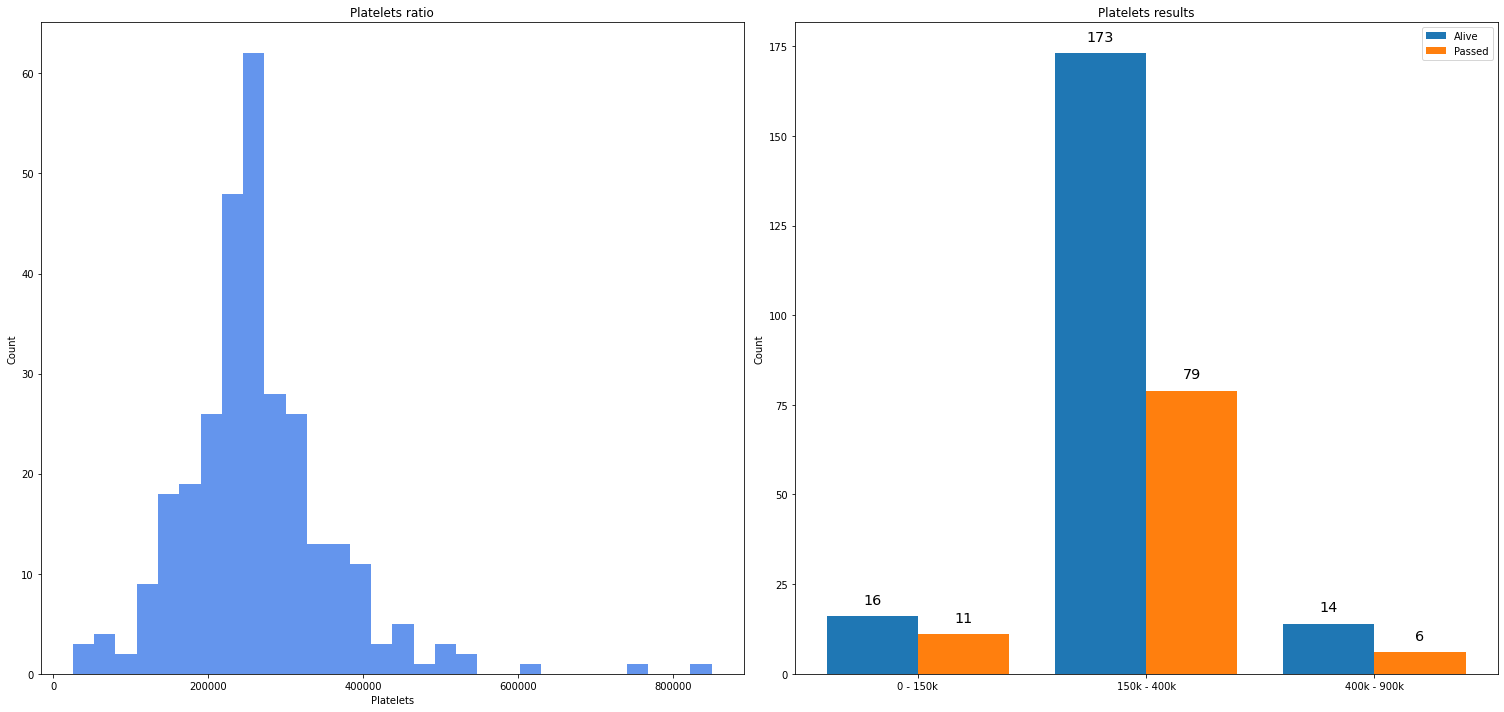

In [12]:
labels = ['0 - 150k','150k - 400k', '400k - 900k']
plat_alive = [0, 0, 0]
plat_dead = [0, 0, 0]

for row in heart:
  if row[6] < 150000:
    if row[12] == 0:
      plat_alive[0] += 1      
    else:
      plat_dead[0] += 1 
  elif row[6] < 400000:
    if row[12] == 0:
      plat_alive[1] += 1      
    else:
      plat_dead[1] += 1 
  else: 
    if row[12] == 0:
      plat_alive[2] += 1      
    else:
      plat_dead[2] += 1   

fig, ax = plt.subplots(1,2)
fig.set_size_inches(21,10)
ax[0].hist(df['platelets'],30,color='cornflowerblue')
ax[0].set_ylabel('Count')
ax[0].set_xlabel('Platelets')
ax[0].set_title('Platelets ratio')
x = np.arange(len(labels))


rects1 = ax[1].bar(x - 0.4/2, plat_alive, 0.4, label='Alive')
rects2 = ax[1].bar(x + 0.4/2, plat_dead, 0.4, label='Passed')
ax[1].set_ylabel('Count')
ax[1].set_title('Platelets results')
ax[1].set_xticks(x)
ax[1].set_xticklabels(labels)
ax[1].legend()
for i in x:
  ax[1].text(x[i] - 0.4/2, plat_alive[i] + 2.5, plat_alive[i] ,ha='center', va='bottom', fontsize = 'x-large')
  ax[1].text(x[i] + 0.4/2, plat_dead[i] + 2.5, plat_dead[i] ,ha='center', va='bottom', fontsize = 'x-large')

fig.tight_layout()
plt.show()

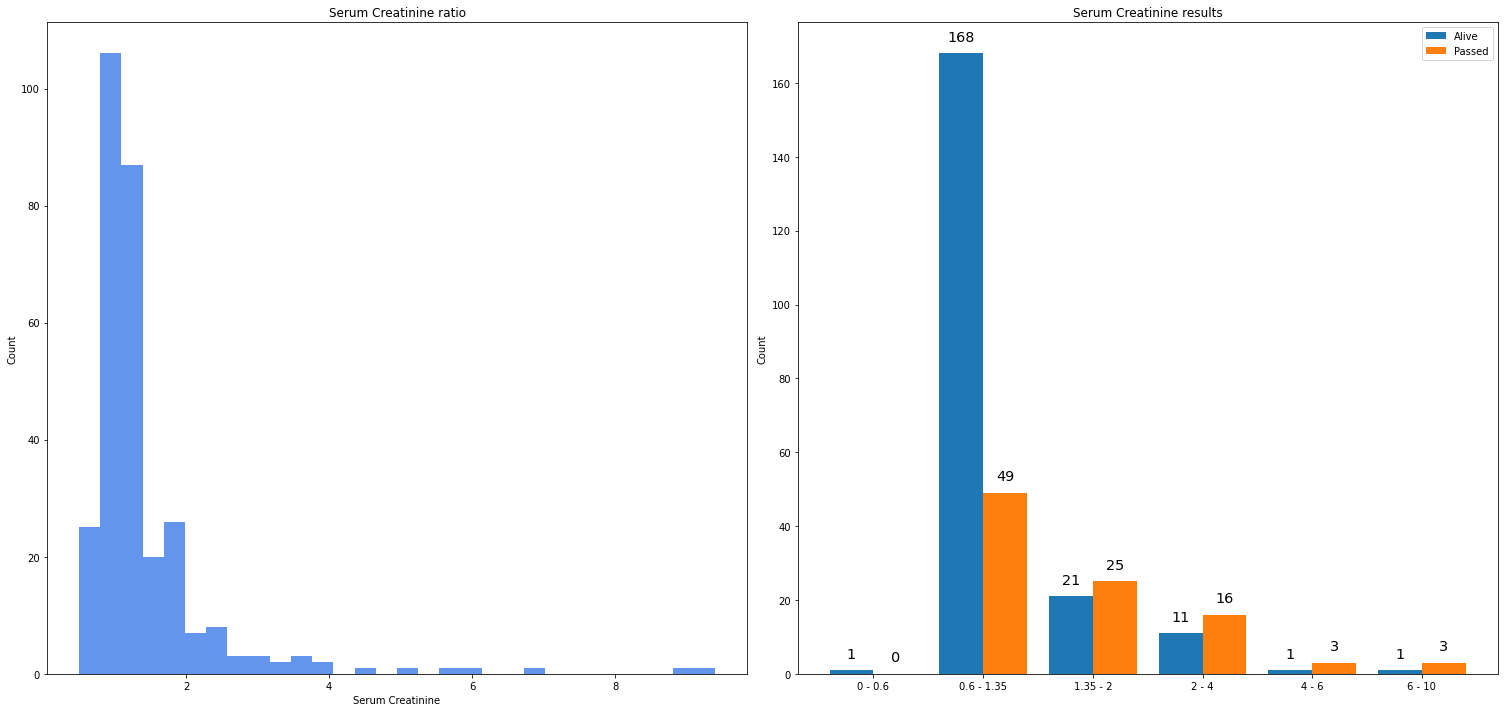

In [14]:
labels = ['0 - 0.6','0.6 - 1.35', '1.35 - 2', '2 - 4', '4 - 6', '6 - 10']
sc_alive = [0, 0, 0, 0, 0, 0]
sc_dead = [0, 0, 0, 0, 0, 0]

for row in heart:
  if row[7] < .6:
    if row[12] == 0:
      sc_alive[0] += 1      
    else:
      sc_dead[0] += 1 
  elif row[7] < 1.35:
    if row[12] == 0:
      sc_alive[1] += 1      
    else:
      sc_dead[1] += 1 
  elif row[7] < 2:
    if row[12] == 0:
      sc_alive[2] += 1      
    else:
      sc_dead[2] += 1
  elif row[7] < 4:
    if row[12] == 0:
      sc_alive[3] += 1      
    else:
      sc_dead[3] += 1
  elif row[7] < 6:
    if row[12] == 0:
      sc_alive[4] += 1      
    else:
      sc_dead[4] += 1    
  else: 
    if row[12] == 0:
      sc_alive[5] += 1      
    else:
      sc_dead[5] += 1   
  

fig, ax = plt.subplots(1,2)
fig.set_size_inches(21,10)
ax[0].hist(df['serum_creatinine'],30,color='cornflowerblue')
ax[0].set_ylabel('Count')
ax[0].set_xlabel('Serum Creatinine')
ax[0].set_title('Serum Creatinine ratio')
x = np.arange(len(labels))


rects1 = ax[1].bar(x - 0.4/2, sc_alive, 0.4, label='Alive')
rects2 = ax[1].bar(x + 0.4/2, sc_dead, 0.4, label='Passed')
ax[1].set_ylabel('Count')
ax[1].set_title('Serum Creatinine results')
ax[1].set_xticks(x)
ax[1].set_xticklabels(labels)
ax[1].legend()
for i in x:
  ax[1].text(x[i] - 0.4/2, sc_alive[i] + 2.5, sc_alive[i] ,ha='center', va='bottom', fontsize = 'x-large')
  ax[1].text(x[i] + 0.4/2, sc_dead[i] + 2.5, sc_dead[i] ,ha='center', va='bottom', fontsize = 'x-large')

fig.tight_layout()
plt.show()

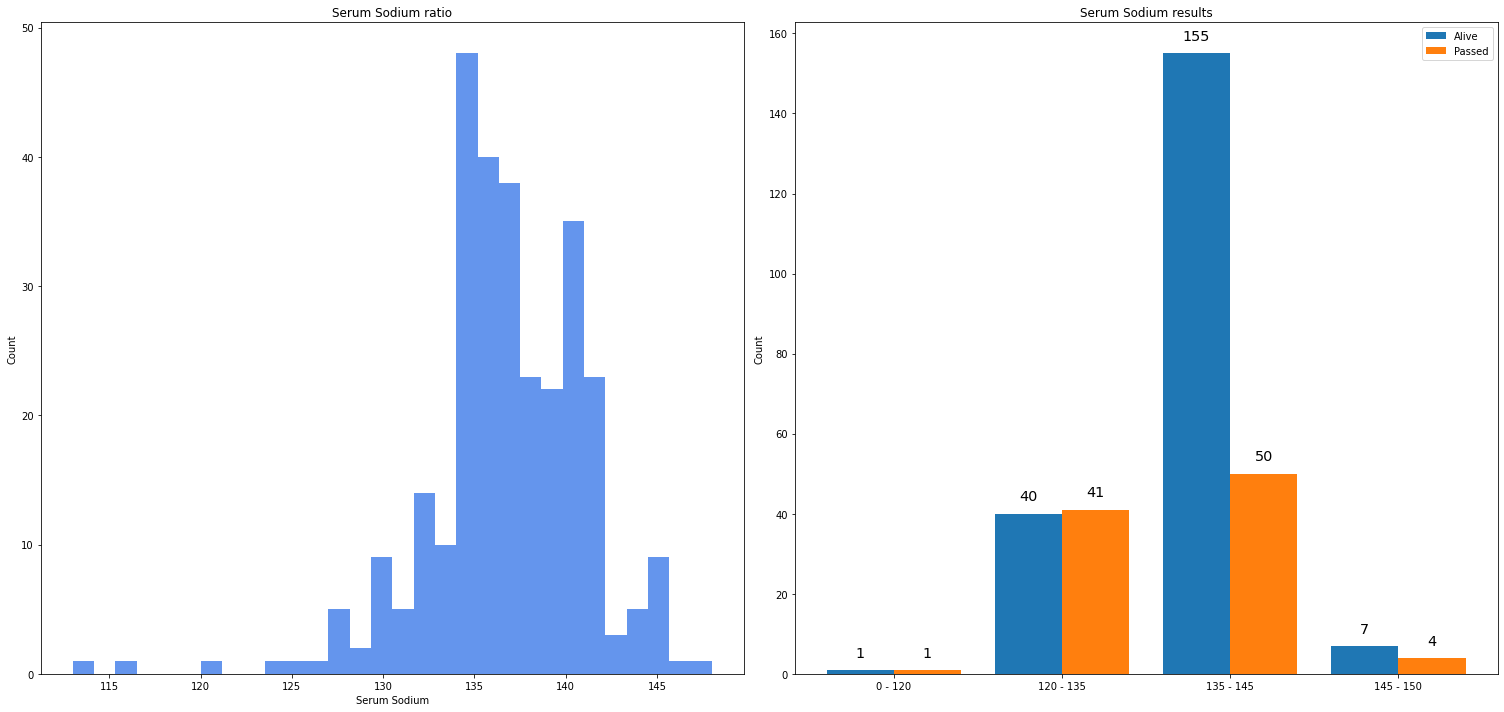

In [15]:
labels = ['0 - 120','120 - 135', '135 - 145', '145 - 150']
ss_alive = [0, 0, 0, 0]
ss_dead = [0, 0, 0, 0]

for row in heart:
  if row[8] < 120:
    if row[12] == 0:
      ss_alive[0] += 1      
    else:
      ss_dead[0] += 1 
  elif row[8] < 135:
    if row[12] == 0:
      ss_alive[1] += 1      
    else:
      ss_dead[1] += 1 
  elif row[8] < 145:
    if row[12] == 0:
      ss_alive[2] += 1      
    else:
      ss_dead[2] += 1 
  else: 
    if row[12] == 0:
      ss_alive[3] += 1      
    else:
      ss_dead[3] += 1   
  

fig, ax = plt.subplots(1,2)
fig.set_size_inches(21,10)
ax[0].hist(df['serum_sodium'],30,color='cornflowerblue')
ax[0].set_ylabel('Count')
ax[0].set_xlabel('Serum Sodium')
ax[0].set_title('Serum Sodium ratio')
x = np.arange(len(labels))


rects1 = ax[1].bar(x - 0.4/2, ss_alive, 0.4, label='Alive')
rects2 = ax[1].bar(x + 0.4/2, ss_dead, 0.4, label='Passed')
ax[1].set_ylabel('Count')
ax[1].set_title('Serum Sodium results')
ax[1].set_xticks(x)
ax[1].set_xticklabels(labels)
ax[1].legend()
for i in x:
  ax[1].text(x[i] - 0.4/2, ss_alive[i] + 2.5, ss_alive[i] ,ha='center', va='bottom', fontsize = 'x-large')
  ax[1].text(x[i] + 0.4/2, ss_dead[i] + 2.5, ss_dead[i] ,ha='center', va='bottom', fontsize = 'x-large')

fig.tight_layout()
plt.show()

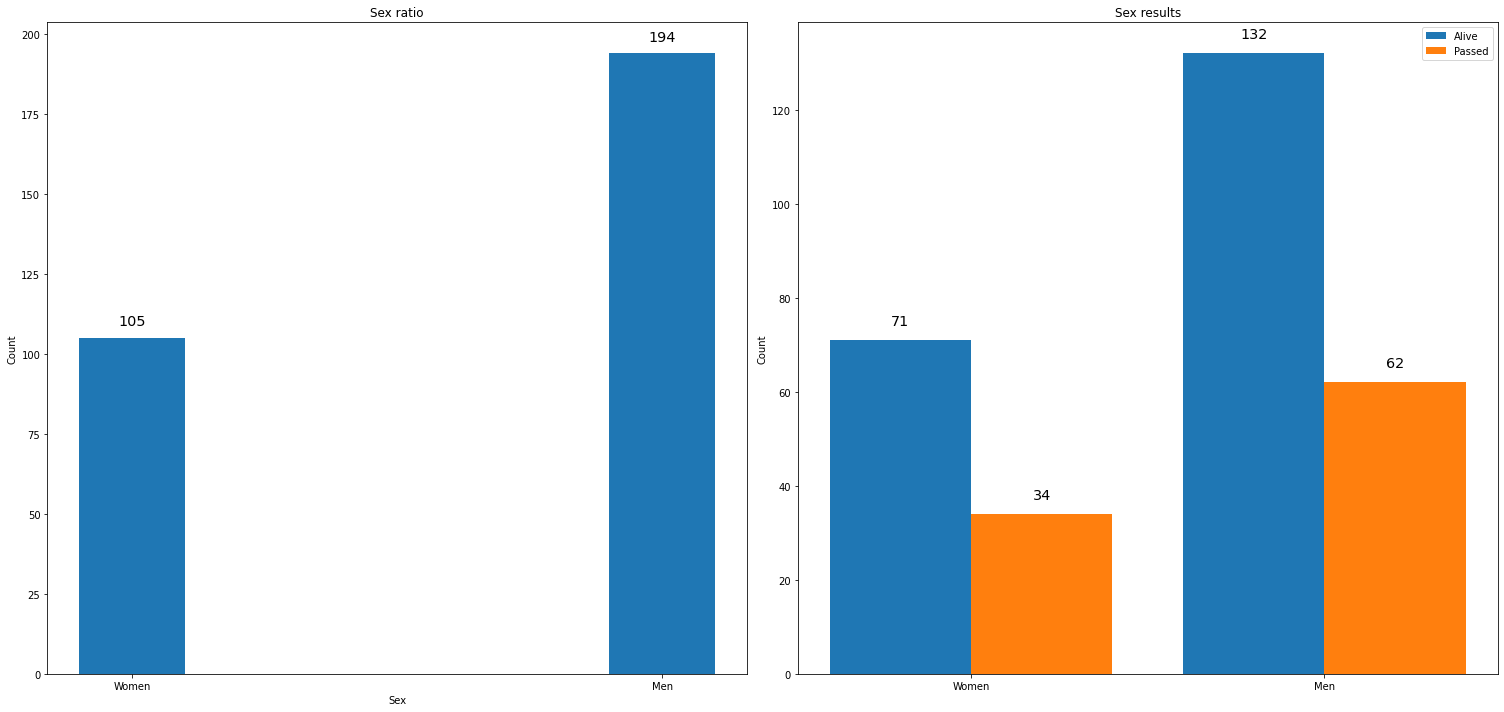

In [16]:
labels = ['Women', 'Men']
sex_alive = [0, 0]
sex_dead = [0, 0]

for row in heart:
  if row[9] == 0:
    if row[12] == 0:
      sex_alive[0] += 1      
    else:
      sex_dead[0] += 1
  else:
    if row[12] == 0:
      sex_alive[1] += 1      
    else:
      sex_dead[1] += 1

x = np.arange(len(labels))
fig, ax = plt.subplots(1,2)
fig.set_size_inches(21,10)
sex = df.sex.value_counts()
sex[0] = df.sex.value_counts()[1]
sex[1] = df.sex.value_counts()[0]
ax[0].bar(x, sex, 0.2)
ax[0].set_ylabel('Count')
ax[0].set_xlabel('Sex')
ax[0].set_title('Sex ratio')
ax[0].set_xticks(x)
ax[0].text(1, df.sex.value_counts()[1] + 3, df.sex.value_counts()[1],ha='center', va='bottom', fontsize = 'x-large')
ax[0].text(0, df.sex.value_counts()[0] + 3, df.sex.value_counts()[0],ha='center', va='bottom', fontsize = 'x-large')
ax[0].set_xticklabels(labels)


rects1 = ax[1].bar(x - 0.4/2, sex_alive, 0.4, label='Alive')
rects2 = ax[1].bar(x + 0.4/2, sex_dead, 0.4, label='Passed')
ax[1].set_ylabel('Count')
ax[1].set_title('Sex results')
ax[1].set_xticks(x)
ax[1].set_xticklabels(labels)
ax[1].legend()
for i in x:
  ax[1].text(x[i] - 0.4/2, sex_alive[i] + 2.5, sex_alive[i] ,ha='center', va='bottom', fontsize = 'x-large')
  ax[1].text(x[i] + 0.4/2, sex_dead[i] + 2.5, sex_dead[i] ,ha='center', va='bottom', fontsize = 'x-large')

fig.tight_layout()
plt.show()

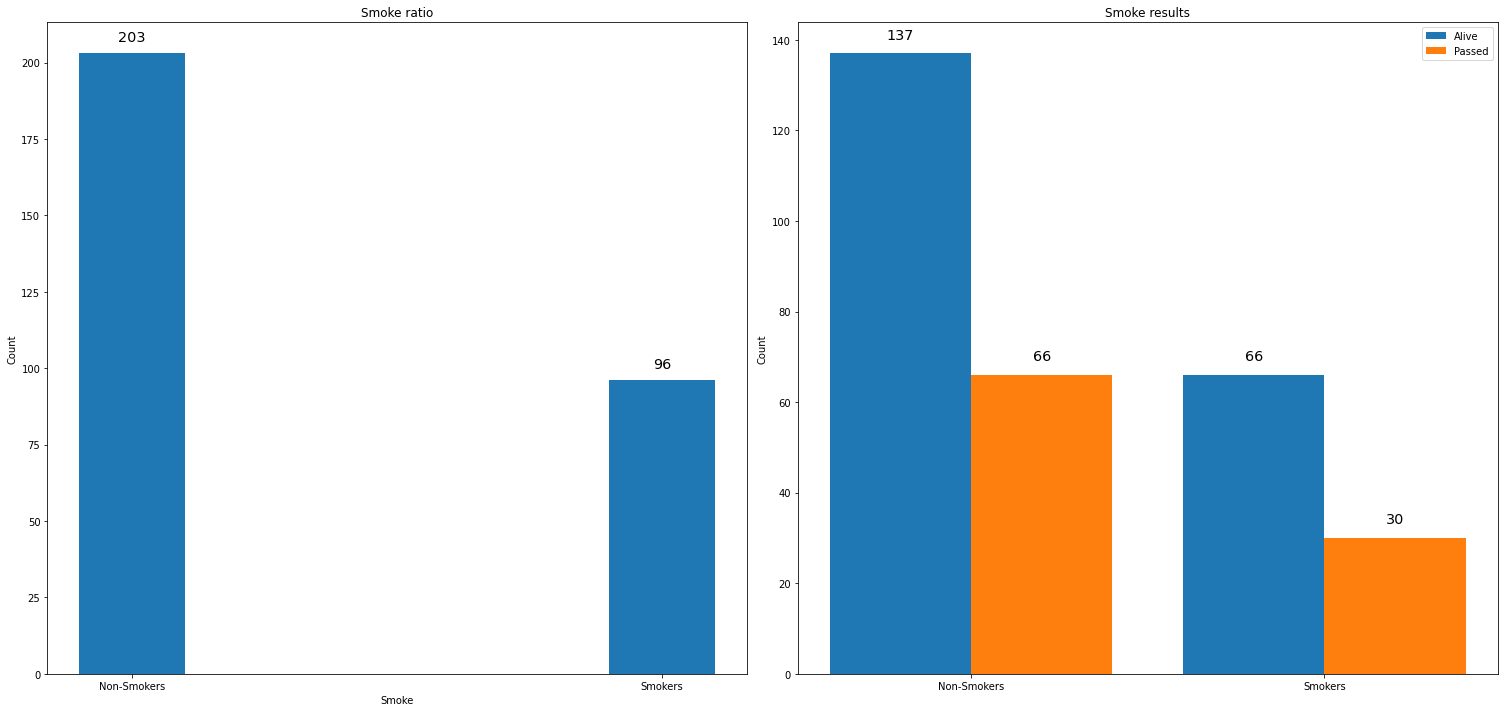

In [17]:
labels = ['Non-Smokers', 'Smokers']
smoke_alive = [0, 0]
smoke_dead = [0, 0]

for row in heart:
  if row[10] == 0:
    if row[12] == 0:
      smoke_alive[0] += 1      
    else:
      smoke_dead[0] += 1
  else:
    if row[12] == 0:
      smoke_alive[1] += 1      
    else:
      smoke_dead[1] += 1

x = np.arange(len(labels))
fig, ax = plt.subplots(1,2)
fig.set_size_inches(21,10)
ax[0].bar(x, df.smoking.value_counts(), 0.2)
ax[0].set_ylabel('Count')
ax[0].set_xlabel('Smoke')
ax[0].set_title('Smoke ratio')
ax[0].set_xticks(x)
ax[0].text(1, df.smoking.value_counts()[1] + 3, df.smoking.value_counts()[1],ha='center', va='bottom', fontsize = 'x-large')
ax[0].text(0, df.smoking.value_counts()[0] + 3, df.smoking.value_counts()[0],ha='center', va='bottom', fontsize = 'x-large')
ax[0].set_xticklabels(labels)


rects1 = ax[1].bar(x - 0.4/2, smoke_alive, 0.4, label='Alive')
rects2 = ax[1].bar(x + 0.4/2, smoke_dead, 0.4, label='Passed')
ax[1].set_ylabel('Count')
ax[1].set_title('Smoke results')
ax[1].set_xticks(x)
ax[1].set_xticklabels(labels)
ax[1].legend()
for i in x:
  ax[1].text(x[i] - 0.4/2, smoke_alive[i] + 2.5, smoke_alive[i] ,ha='center', va='bottom', fontsize = 'x-large')
  ax[1].text(x[i] + 0.4/2, smoke_dead[i] + 2.5, smoke_dead[i] ,ha='center', va='bottom', fontsize = 'x-large')

fig.tight_layout()
plt.show()

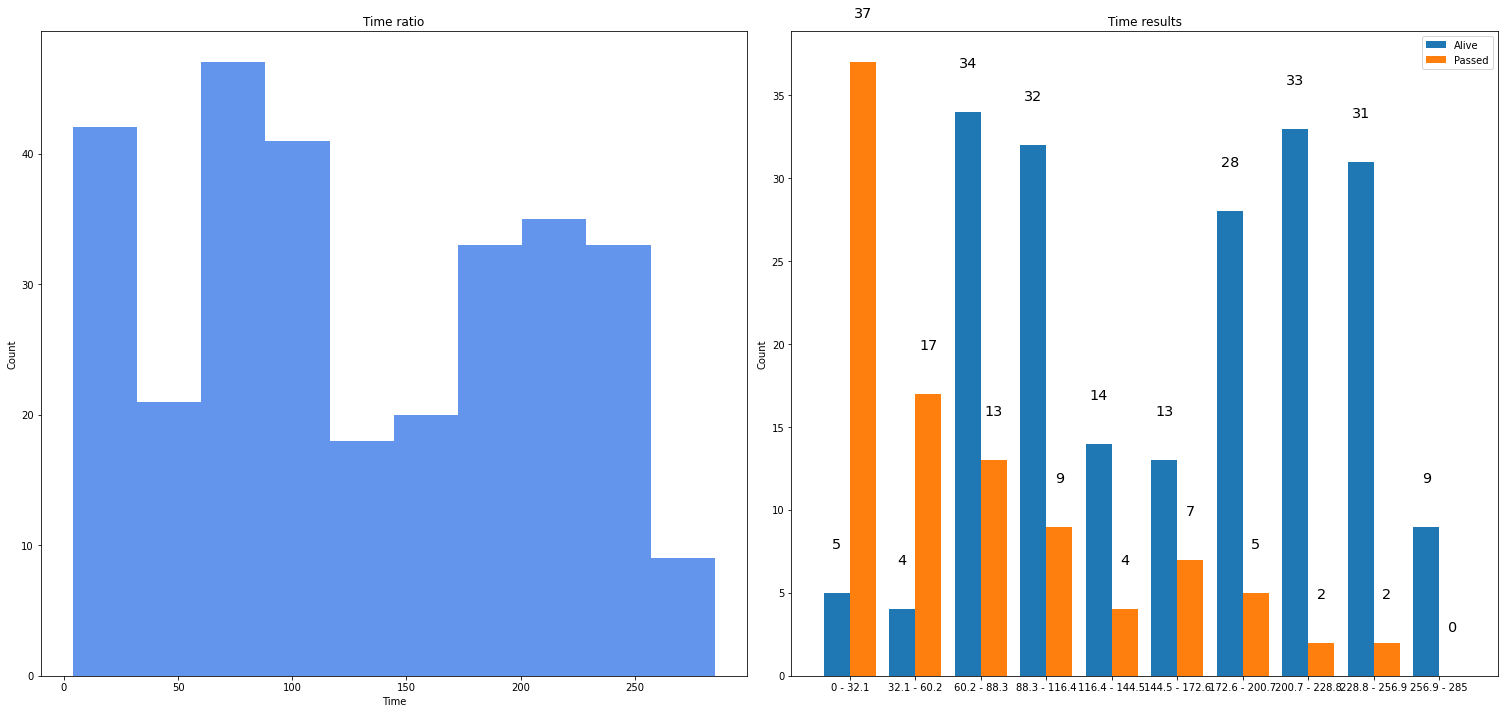

In [18]:
labels = ['0 - 32.1','32.1 - 60.2', '60.2 - 88.3', '88.3 - 116.4', '116.4 - 144.5', '144.5 - 172.6', '172.6 - 200.7', '200.7 - 228.8', '228.8 - 256.9', '256.9 - 285']
time_alive = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
time_dead = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

for row in heart:
  if row[11] < 32.1:
    if row[12] == 0:
      time_alive[0] += 1      
    else:
      time_dead[0] += 1 
  elif row[11] < 60.2:
    if row[12] == 0:
      time_alive[1] += 1      
    else:
      time_dead[1] += 1 
  elif row[11] < 88.3:
    if row[12] == 0:
      time_alive[2] += 1      
    else:
      time_dead[2] += 1
  elif row[11] < 116.4:
    if row[12] == 0:
      time_alive[3] += 1      
    else:
      time_dead[3] += 1 
  elif row[11] < 144.5:
    if row[12] == 0:
      time_alive[4] += 1      
    else:
      time_dead[4] += 1 
  elif row[11] < 172.6:
    if row[12] == 0:
      time_alive[5] += 1      
    else:
      time_dead[5] += 1 
  elif row[11] < 200.7:
    if row[12] == 0:
      time_alive[6] += 1      
    else:
      time_dead[6] += 1
  elif row[11] < 228.8:
    if row[12] == 0:
      time_alive[7] += 1      
    else:
      time_dead[7] += 1 
  elif row[11] < 256.9:
    if row[12] == 0:
      time_alive[8] += 1      
    else:
      time_dead[8] += 1 
  else: 
    if row[12] == 0:
      time_alive[9] += 1      
    else:
      time_dead[9] += 1   
  

fig, ax = plt.subplots(1,2)
fig.set_size_inches(21,10)
ax[0].hist(df['time'],color='cornflowerblue')
ax[0].set_ylabel('Count')
ax[0].set_xlabel('Time')
ax[0].set_title('Time ratio')
x = np.arange(len(labels))


rects1 = ax[1].bar(x - 0.4/2, time_alive, 0.4, label='Alive')
rects2 = ax[1].bar(x + 0.4/2, time_dead, 0.4, label='Passed')
ax[1].set_ylabel('Count')
ax[1].set_title('Time results')
ax[1].set_xticks(x)
ax[1].set_xticklabels(labels)
ax[1].legend()
for i in x:
  ax[1].text(x[i] - 0.4/2, time_alive[i] + 2.5, time_alive[i] ,ha='center', va='bottom', fontsize = 'x-large')
  ax[1].text(x[i] + 0.4/2, time_dead[i] + 2.5, time_dead[i] ,ha='center', va='bottom', fontsize = 'x-large')

fig.tight_layout()
plt.show()